<a href="https://colab.research.google.com/github/CasillasAlba/GeneFlow/blob/main/colab_files/Prueba_Workflow.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# ============================================================
# CONEXIÓN CON GOOGLE DRIVE
# ============================================================

In [ ]:
from google.colab import drive
drive.mount("/content/drive") # Se monta el Drive

from google.colab import files

In [ ]:
!pip install -U kaleido

# ============================================================
# USO DE FICHEROS .PY COMO MÓDULO EN COLAB
# ============================================================

In [3]:
!cp /content/drive/MyDrive/TFG/GeneFlow/src/dataobject.py /content
!cp /content/drive/MyDrive/TFG/GeneFlow/src/etl.py /content
!cp /content/drive/MyDrive/TFG/GeneFlow/src/model.py /content
!cp /content/drive/MyDrive/TFG/GeneFlow/src/objects.py /content
!cp /content/drive/MyDrive/TFG/GeneFlow/src/processing.py /content
!cp /content/drive/MyDrive/TFG/GeneFlow/src/utils.py /content
!cp /content/drive/MyDrive/TFG/GeneFlow/src/visualize.py /content

!cp /content/drive/MyDrive/TFG/GeneFlow/geneflow.py /content

# ============================================================
# IMPORTAMOS GENEFLOW
# ============================================================

In [ ]:
import geneflow as genf

# ============================================================
# DESCARGA Y LECTURA DE DATOS
# ============================================================

Descargamos los datos del cáncer TCGA-SKCM (Skin cutaneous melanoma / cáncer de melanoma) de la plataforma de GDC. Los datos descargados se encuentran disponibles en la plataforma GDC Lgeacy, utilizando los datos que se encuentran normalizados.

Después se procede a realizar la lectura de los datos descargados.

In [5]:
gdc_query = genf.create_gdc_query(project = "TCGA-SKCM", legacy=True, data_category = "Gene expression", data_type = "Gene Expression Quantification",
                        experimental_strategy = "RNA-Seq", normalized = True)

genf.gdc_download_data(gdc_query)

count_data = genf.gdc_read_rna("TCGA-SKCM")

count_data.head()

Searching in GDC database
Accessing GDC. This might take a while...

Project TCGA-SKCM
Checking if the parameters are correct...


Reading manifest...

Manifest read.

Reading the data...

Joining the data... It might take a moment.

Data successfully read.



,TCGA-EB-A5UN-06A-11R-A311-07,TCGA-FS-A4F4-06A-12R-A266-07,TCGA-ER-A2NF-06A-11R-A18T-07,TCGA-EE-A183-06A-11R-A18S-07,TCGA-XV-AAZV-01A-11R-A40A-07,TCGA-HR-A2OH-06A-11R-A18U-07,TCGA-EB-A42Z-01A-12R-A24X-07,TCGA-D3-A2J7-06A-11R-A18T-07,TCGA-EE-A2M5-06A-12R-A18S-07,TCGA-FR-A7UA-06A-32R-A352-07,...,TCGA-D3-A3BZ-06A-12R-A18S-07,TCGA-EE-A29S-06A-11R-A18T-07,TCGA-ER-A2NE-06A-21R-A18T-07,TCGA-D3-A3CB-06A-11R-A18S-07,TCGA-YG-AA3P-06A-11R-A38C-07,TCGA-D3-A5GR-06A-11R-A27Q-07,TCGA-EE-A3J4-06A-11R-A20F-07,TCGA-D3-A2JO-06A-11R-A18S-07,TCGA-Z2-A8RT-06A-11R-A37K-07,TCGA-D3-A51G-06A-11R-A266-07
gene_id,,,,,,,,,,,,,,,,,,,,,
A1BG,178.4523,709.7586,272.1310,412.0316,298.1174,254.7970,259.9160,130.9387,167.0387,238.8859,...,322.7875,141.6944,313.4030,246.2074,33.5642,226.2109,11.2680,266.4414,336.4070,97.7484
A1CF,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.5305,...,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.3876,0.0000
A2BP1,0.0000,0.0000,0.3765,0.0000,0.4852,0.0000,0.0000,0.0000,0.3488,0.0000,...,0.0000,0.0000,0.0000,0.0000,66.0629,1.1891,0.0000,0.0000,0.0000,0.0000
A2LD1,53.1131,86.3448,256.1747,99.9928,88.2484,64.9063,195.9703,55.8196,83.9344,90.8647,...,120.1908,205.9438,114.9119,144.7538,50.0426,71.9857,5.8259,47.1333,37.3178,38.2306
A2ML1,1.7738,0.0000,1.5060,1.4383,1331.8777,0.0000,0.6458,0.0000,50.2267,0.0000,...,6.2221,0.6040,43.3224,0.4052,0.0000,1.1891,0.3427,0.5876,0.0000,0.0000


# ============================================================
# DESCARGA Y LECTURA DE DATOS CLÍNICOS
# ============================================================

In [7]:
nm_clinical_type = "patient"

genf.gdc_download_clinical_data("TCGA-SKCM", nm_clinical_type, legacy = True)

clinical_data = genf.gdc_read_clinical("TCGA-SKCM/nationwidechildrens.org_clinical_patient_skcm.txt")

clinical_data.head()

Searching in GDC database
Clinical Information: patient already exists in the current directory.


,bcr_patient_uuid,form_completion_date,tissue_prospective_collection_indicator,tissue_retrospective_collection_indicator,days_to_birth,gender,height,weight,race,ethnicity,...,extranodal_involvement,icd_10,icd_o_3_histology,icd_o_3_site,informed_consent_verified,patient_id,project_code,stage_other,tissue_source_site,tumor_tissue_site_other
bcr_patient_barcode,,,,,,,,,,,,,,,,,,,,,
TCGA-3N-A9WB,5564E6A7-2195-4B0D-994E-B0617B58E889,2014-5-29,YES,NO,-26176,MALE,175,78,WHITE,NOT HISPANIC OR LATINO,...,[Not Applicable],C44.5,8720/3,C44.5,YES,A9WB,[Not Available],[Not Available],3N,[Not Applicable]
TCGA-3N-A9WC,551E071A-C290-4B48-9000-F64C2A44DFB7,2014-5-29,YES,NO,-30286,MALE,183,68,WHITE,NOT HISPANIC OR LATINO,...,[Not Applicable],C77.3,8720/3,C77.3,YES,A9WC,[Not Available],[Not Available],3N,[Not Applicable]
TCGA-3N-A9WD,A29A20E3-5C2C-4F37-B93E-AE9EBC46EC53,2014-5-29,YES,NO,-30163,MALE,183,116,WHITE,NOT HISPANIC OR LATINO,...,[Not Applicable],C77.0,8720/3,C77.0,YES,A9WD,[Not Available],[Not Available],3N,[Not Applicable]
TCGA-BF-A1PU,3DD5A206-D7F3-42F1-B9CC-4B31C76D495D,2013-4-25,YES,NO,-17025,FEMALE,160,58,WHITE,[Unknown],...,[Not Applicable],C44.9,8720/3,C44.9,YES,A1PU,[Not Available],[Not Available],BF,[Not Applicable]
TCGA-BF-A1PV,EFF78AF6-0F68-49B9-866B-0D511606F2B1,2013-4-25,YES,NO,-27124,FEMALE,160,70,WHITE,[Unknown],...,[Not Applicable],C44.9,8720/3,C44.9,YES,A1PV,[Not Available],[Not Available],BF,[Not Applicable]


# ============================================================
# CREACIÓN DEL OBJETO DATAOBJECT
# ============================================================

El objeto DataObject se crea con la información coincidente de la matriz de conteo y la información clínica de las muestras asociadas.

In [8]:
# Creacion del DataObject
data = genf.create_data_object(count_data, obs_ = clinical_data)

data.summary_object()



Creating DataObject...


##############################################

Data Object
	Dimensions:  (20502, 473)
	Row Names (20502): A1BG ... tAKR
	Column Names (473): TCGA-3N-A9WB ... TCGA-Z2-AA3V

	Var
		There is no data for Var

	Obs
		Dimensions:  (469, 61)
		Row Names (469): TCGA-3N-A9WB ... TCGA-Z2-AA3V
		Column Names (61): bcr_patient_uuid ... tumor_tissue_site_other

##############################################


Se crea una copia del objeto DataObject antes de realizar ningún análisis para comprobar el funcionamiento de la replicación del flujo de trabajo.

In [9]:
bulk_data = genf.copy_object(data)

# ============================================================
# CORRELACIÓN DE MUESTRAS DUPLICADAS
# ============================================================

Se muestra una gráfica con aquellas muestras duplicadas (misma muestra, diferentes valores), para evaluar su correlación. 

In [10]:
data_columns = data.counts_columnames()

clinic_rownames = data.obs_rownames()

common_elements = genf.list_intersection(data_columns, clinic_rownames)

duplicate_data = genf.duplicates(data.get_counts(), axis = 1)

print("Datos con muestras duplicadas\n\n")
duplicate_data.head()

Datos con muestras duplicadas




,TCGA-D3-A1QA,TCGA-D3-A1QA,TCGA-ER-A19T,TCGA-ER-A19T,TCGA-ER-A2NF,TCGA-ER-A2NF,TCGA-GN-A4U8,TCGA-GN-A4U8
gene_id,,,,,,,,
A1BG,168.7065,244.4263,72.3596,163.7268,205.2622,272.1310,174.1325,190.7084
A1CF,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000
A2BP1,0.0000,0.0000,0.0000,0.0000,1.0776,0.3765,0.4016,0.3596
A2LD1,101.7687,94.3661,60.9169,56.7330,225.3772,256.1747,145.3936,135.5735
A2ML1,0.4975,0.3541,21.5730,0.0000,58.1897,1.5060,0.0000,0.7192


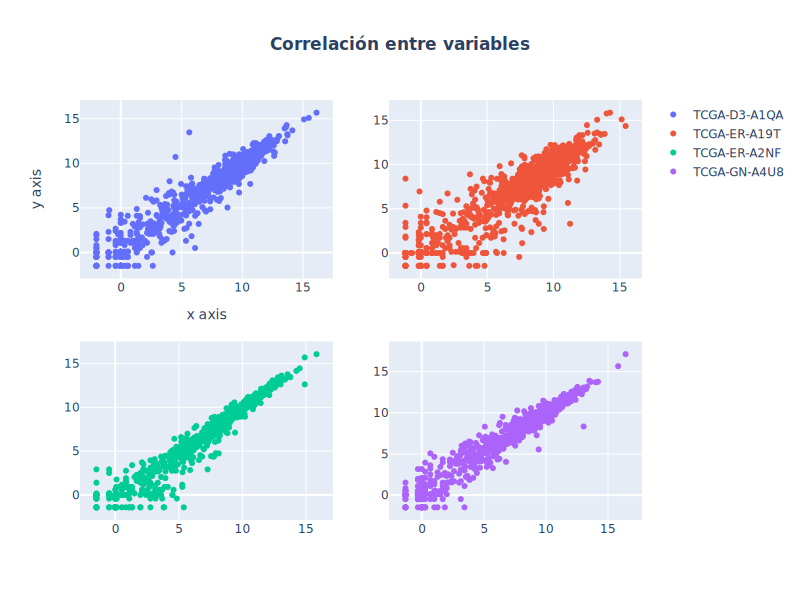

In [12]:
fig = genf.duplicated_corr_plot(duplicate_data.apply(genf.ut.pd.to_numeric))

genf.show_figure(fig, legend = True, title = "Correlación entre variables")

Se decide eliminar una de las muestras por cada par de duplicados, manteniendo la primera aparición de la muestra en el conjunto de datos.

In [13]:
data = genf.counts_drop_duplicates(data, axis = 1, keep = "first", by_name = True)

data.summary_object()

print("Matriz de conteo\n")
(data.get_counts()).head()


##############################################

Data Object
	Dimensions:  (20502, 469)
	Row Names (20502): A1BG ... tAKR
	Column Names (469): TCGA-3N-A9WB ... TCGA-Z2-AA3V

	Var
		There is no data for Var

	Obs
		Dimensions:  (469, 61)
		Row Names (469): TCGA-3N-A9WB ... TCGA-Z2-AA3V
		Column Names (61): bcr_patient_uuid ... tumor_tissue_site_other

##############################################
Matriz de conteo



,TCGA-3N-A9WB,TCGA-3N-A9WC,TCGA-3N-A9WD,TCGA-BF-A1PU,TCGA-BF-A1PV,TCGA-BF-A1PX,TCGA-BF-A1PZ,TCGA-BF-A1Q0,TCGA-BF-A3DJ,TCGA-BF-A3DL,...,TCGA-XV-AB01,TCGA-YD-A89C,TCGA-YD-A9TA,TCGA-YD-A9TB,TCGA-YG-AA3N,TCGA-YG-AA3O,TCGA-YG-AA3P,TCGA-Z2-A8RT,TCGA-Z2-AA3S,TCGA-Z2-AA3V
gene_id,,,,,,,,,,,,,,,,,,,,,
A1BG,381.0662,195.1822,360.8794,176.3994,216.8470,285.0608,424.5848,327.8758,232.2936,380.7694,...,428.9256,184.5297,88.4289,264.5184,238.8846,207.9831,33.5642,336.4070,349.4478,717.2209
A1CF,0.0000,0.0000,0.7092,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,...,0.0000,0.0000,1.3482,0.0000,0.0000,0.0000,0.0000,0.3876,0.0000,0.0000
A2BP1,0.0000,0.0000,6.3830,1.2987,0.0000,0.0000,0.0000,0.0000,0.0000,0.4901,...,0.0000,0.0000,0.0000,0.0000,0.5522,0.3380,66.0629,0.0000,0.2880,0.6539
A2LD1,250.1979,160.7548,97.1986,163.2338,60.8727,125.6900,78.8939,67.7049,92.9554,99.8579,...,47.5207,102.4404,36.9476,146.3544,88.2441,86.2831,50.0426,37.3178,152.9786,50.7438
A2ML1,7.2698,0.0000,0.0000,7.7922,0.5977,3277.0247,26.8887,5.6324,984.6631,0.4901,...,0.0000,0.0000,0.0000,0.0000,1701.2700,0.0000,0.0000,0.0000,0.2880,0.0000


# ============================================================
# NORMALIZACIÓN CON CPM
# ============================================================

Se realiza una normalización CPM (Counts-per-million) sobre los datos.

In [14]:
data = genf.counts_cpm(data, log_method = True)

data.summary_object()

print("Matriz de conteo con CPM aplicado\n")

(data.get_counts()).head()


##############################################

Data Object
	Dimensions:  (20502, 469)
	Row Names (20502): A1BG ... tAKR
	Column Names (469): TCGA-3N-A9WB ... TCGA-Z2-AA3V

	Var
		There is no data for Var

	Obs
		Dimensions:  (469, 61)
		Row Names (469): TCGA-3N-A9WB ... TCGA-Z2-AA3V
		Column Names (61): bcr_patient_uuid ... tumor_tissue_site_other

##############################################
Matriz de conteo con CPM aplicado



,TCGA-3N-A9WB,TCGA-3N-A9WC,TCGA-3N-A9WD,TCGA-BF-A1PU,TCGA-BF-A1PV,TCGA-BF-A1PX,TCGA-BF-A1PZ,TCGA-BF-A1Q0,TCGA-BF-A3DJ,TCGA-BF-A3DL,...,TCGA-XV-AB01,TCGA-YD-A89C,TCGA-YD-A9TA,TCGA-YD-A9TB,TCGA-YG-AA3N,TCGA-YG-AA3O,TCGA-YG-AA3P,TCGA-Z2-A8RT,TCGA-Z2-AA3S,TCGA-Z2-AA3V
gene_id,,,,,,,,,,,,,,,,,,,,,
A1BG,4.310626,3.388371,3.843876,3.080172,3.653413,3.753141,4.414238,3.998455,3.528490,3.998671,...,4.041738,3.155790,2.312579,3.932633,3.473055,3.547103,0.780694,4.132288,4.254961,4.709045
A1CF,-3.322182,-3.322182,-2.965738,-3.322182,-3.322182,-3.322182,-3.322182,-3.322182,-3.322182,-3.322182,...,-3.322182,-3.322182,-2.521213,-3.322182,-3.322182,-3.322182,-3.322182,-3.058024,-3.322182,-3.322182
A2BP1,-3.322182,-3.322182,-1.505593,-2.630303,-3.322182,-3.322182,-3.322182,-3.322182,-3.322182,-3.053747,...,-3.322182,-3.322182,-3.322182,-3.322182,-2.995162,-3.073194,1.715704,-3.322182,-3.112343,-3.014644
A2LD1,3.707451,3.111359,1.978364,2.969641,1.849680,2.585242,2.015514,1.756908,2.225768,2.092865,...,0.936274,2.319633,1.093443,3.086337,2.058319,2.295087,1.329011,1.024478,3.072884,0.958604
A2ML1,-1.069003,-3.322182,-3.322182,-1.091882,-2.895504,7.266385,0.530000,-1.423425,5.602588,-3.053747,...,-3.322182,-3.322182,-3.322182,-3.322182,6.294072,-3.322182,-3.322182,-3.322182,-3.112343,-3.322182


# ============================================================
# VISUALIZACIÓN DEL FLUJO DE TRABAJO GUARDADO
# ============================================================

Aplicar las tareas previamente descritas sobre el objeto DataObject, conlleva que implícitamente se guarde las acciones tomadas sobre los datos en un flujo de trabajo. En este caso, el flujo de trabajo conllevaría lo siguiente:

In [16]:
(data.get_workflow()).summary_workflow()


Workflow:
{'type': 'dataobject.CountsDropDuplicates', 'axis': 1, 'keep': 'first', 'by_name': True}


{'type': 'dataobject.CountsCPM', 'log_method': True, 'prior_count': 2}




El flujo de trabajo guardado se aplicará sobre una copia de los datos en bruto.

In [19]:
pipeline = data.get_workflow()

print("Copia del objeto DataObject:\n")

bulk_data.summary_object()

print("\n")

(bulk_data.get_counts()).head()

Copia del objeto DataObject:


##############################################

Data Object
	Dimensions:  (20502, 473)
	Row Names (20502): A1BG ... tAKR
	Column Names (473): TCGA-3N-A9WB ... TCGA-Z2-AA3V

	Var
		There is no data for Var

	Obs
		Dimensions:  (469, 61)
		Row Names (469): TCGA-3N-A9WB ... TCGA-Z2-AA3V
		Column Names (61): bcr_patient_uuid ... tumor_tissue_site_other

##############################################




,TCGA-3N-A9WB,TCGA-3N-A9WC,TCGA-3N-A9WD,TCGA-BF-A1PU,TCGA-BF-A1PV,TCGA-BF-A1PX,TCGA-BF-A1PZ,TCGA-BF-A1Q0,TCGA-BF-A3DJ,TCGA-BF-A3DL,...,TCGA-XV-AB01,TCGA-YD-A89C,TCGA-YD-A9TA,TCGA-YD-A9TB,TCGA-YG-AA3N,TCGA-YG-AA3O,TCGA-YG-AA3P,TCGA-Z2-A8RT,TCGA-Z2-AA3S,TCGA-Z2-AA3V
gene_id,,,,,,,,,,,,,,,,,,,,,
A1BG,381.0662,195.1822,360.8794,176.3994,216.8470,285.0608,424.5848,327.8758,232.2936,380.7694,...,428.9256,184.5297,88.4289,264.5184,238.8846,207.9831,33.5642,336.4070,349.4478,717.2209
A1CF,0.0000,0.0000,0.7092,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,...,0.0000,0.0000,1.3482,0.0000,0.0000,0.0000,0.0000,0.3876,0.0000,0.0000
A2BP1,0.0000,0.0000,6.3830,1.2987,0.0000,0.0000,0.0000,0.0000,0.0000,0.4901,...,0.0000,0.0000,0.0000,0.0000,0.5522,0.3380,66.0629,0.0000,0.2880,0.6539
A2LD1,250.1979,160.7548,97.1986,163.2338,60.8727,125.6900,78.8939,67.7049,92.9554,99.8579,...,47.5207,102.4404,36.9476,146.3544,88.2441,86.2831,50.0426,37.3178,152.9786,50.7438
A2ML1,7.2698,0.0000,0.0000,7.7922,0.5977,3277.0247,26.8887,5.6324,984.6631,0.4901,...,0.0000,0.0000,0.0000,0.0000,1701.2700,0.0000,0.0000,0.0000,0.2880,0.0000


# ============================================================
# REPRODUCCIÓN DEL FLUJO DE TRABAJO
# ============================================================

Se replican los pasos guardados en el flujo de trabajo sobre la copia de los datos, obteniendo el mismo resultado.

In [20]:
data_pip = pipeline.apply(bulk_data)

data_pip.summary_object()


##############################################

Data Object
	Dimensions:  (20502, 469)
	Row Names (20502): A1BG ... tAKR
	Column Names (469): TCGA-3N-A9WB ... TCGA-Z2-AA3V

	Var
		There is no data for Var

	Obs
		Dimensions:  (469, 61)
		Row Names (469): TCGA-3N-A9WB ... TCGA-Z2-AA3V
		Column Names (61): bcr_patient_uuid ... tumor_tissue_site_other

##############################################


# ============================================================
# COMPARACIÓN DE RESULTADOS
# ============================================================

In [21]:
# ORIGINAL DATA
print("Datos originales\n")
(data.get_counts()).head()

Datos originales



,TCGA-3N-A9WB,TCGA-3N-A9WC,TCGA-3N-A9WD,TCGA-BF-A1PU,TCGA-BF-A1PV,TCGA-BF-A1PX,TCGA-BF-A1PZ,TCGA-BF-A1Q0,TCGA-BF-A3DJ,TCGA-BF-A3DL,...,TCGA-XV-AB01,TCGA-YD-A89C,TCGA-YD-A9TA,TCGA-YD-A9TB,TCGA-YG-AA3N,TCGA-YG-AA3O,TCGA-YG-AA3P,TCGA-Z2-A8RT,TCGA-Z2-AA3S,TCGA-Z2-AA3V
gene_id,,,,,,,,,,,,,,,,,,,,,
A1BG,4.310626,3.388371,3.843876,3.080172,3.653413,3.753141,4.414238,3.998455,3.528490,3.998671,...,4.041738,3.155790,2.312579,3.932633,3.473055,3.547103,0.780694,4.132288,4.254961,4.709045
A1CF,-3.322182,-3.322182,-2.965738,-3.322182,-3.322182,-3.322182,-3.322182,-3.322182,-3.322182,-3.322182,...,-3.322182,-3.322182,-2.521213,-3.322182,-3.322182,-3.322182,-3.322182,-3.058024,-3.322182,-3.322182
A2BP1,-3.322182,-3.322182,-1.505593,-2.630303,-3.322182,-3.322182,-3.322182,-3.322182,-3.322182,-3.053747,...,-3.322182,-3.322182,-3.322182,-3.322182,-2.995162,-3.073194,1.715704,-3.322182,-3.112343,-3.014644
A2LD1,3.707451,3.111359,1.978364,2.969641,1.849680,2.585242,2.015514,1.756908,2.225768,2.092865,...,0.936274,2.319633,1.093443,3.086337,2.058319,2.295087,1.329011,1.024478,3.072884,0.958604
A2ML1,-1.069003,-3.322182,-3.322182,-1.091882,-2.895504,7.266385,0.530000,-1.423425,5.602588,-3.053747,...,-3.322182,-3.322182,-3.322182,-3.322182,6.294072,-3.322182,-3.322182,-3.322182,-3.112343,-3.322182


In [22]:
# REBUILD DATA
print("Datos reconstruidos\n")
(bulk_data.get_counts()).head()

Datos reconstruidos



,TCGA-3N-A9WB,TCGA-3N-A9WC,TCGA-3N-A9WD,TCGA-BF-A1PU,TCGA-BF-A1PV,TCGA-BF-A1PX,TCGA-BF-A1PZ,TCGA-BF-A1Q0,TCGA-BF-A3DJ,TCGA-BF-A3DL,...,TCGA-XV-AB01,TCGA-YD-A89C,TCGA-YD-A9TA,TCGA-YD-A9TB,TCGA-YG-AA3N,TCGA-YG-AA3O,TCGA-YG-AA3P,TCGA-Z2-A8RT,TCGA-Z2-AA3S,TCGA-Z2-AA3V
gene_id,,,,,,,,,,,,,,,,,,,,,
A1BG,4.310626,3.388371,3.843876,3.080172,3.653413,3.753141,4.414238,3.998455,3.528490,3.998671,...,4.041738,3.155790,2.312579,3.932633,3.473055,3.547103,0.780694,4.132288,4.254961,4.709045
A1CF,-3.322182,-3.322182,-2.965738,-3.322182,-3.322182,-3.322182,-3.322182,-3.322182,-3.322182,-3.322182,...,-3.322182,-3.322182,-2.521213,-3.322182,-3.322182,-3.322182,-3.322182,-3.058024,-3.322182,-3.322182
A2BP1,-3.322182,-3.322182,-1.505593,-2.630303,-3.322182,-3.322182,-3.322182,-3.322182,-3.322182,-3.053747,...,-3.322182,-3.322182,-3.322182,-3.322182,-2.995162,-3.073194,1.715704,-3.322182,-3.112343,-3.014644
A2LD1,3.707451,3.111359,1.978364,2.969641,1.849680,2.585242,2.015514,1.756908,2.225768,2.092865,...,0.936274,2.319633,1.093443,3.086337,2.058319,2.295087,1.329011,1.024478,3.072884,0.958604
A2ML1,-1.069003,-3.322182,-3.322182,-1.091882,-2.895504,7.266385,0.530000,-1.423425,5.602588,-3.053747,...,-3.322182,-3.322182,-3.322182,-3.322182,6.294072,-3.322182,-3.322182,-3.322182,-3.112343,-3.322182
